In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from mlxtend.data import loadlocal_mnist

In [4]:
def one_vs_all(x_train, y_train, x_test):
    y_pred = np.zeros((10,x_test.shape[0]))
    for i in range(10):
        y_tr =np.array(y_train)
        y_tr[np.where(y_tr!=i)]=-1
        lrg.fit(x_train, y_tr)
        y_pred[i,:] = lrg.predict_proba(x_test)[:,0]    
    return y_pred

In [5]:
def predict_one_vs_all(x_train, y_train, x_test):
    y_pred = one_vs_all(x_train, y_train, x_test)
    ind = np.argmax(y_pred, axis=0)
    return ind

In [6]:
def ConfusionMatrix(y_pred, y_test):
    mat = np.zeros((10,10))
    for p in range(y_test.size):
        mat[y_pred[p],y_test[p]] +=1
    return mat

In [7]:
def Compute(mat):
    error = np.zeros(10)
    for i in range(10):
        error[i] = (((np.sum(mat[i,:])-mat[i,i]))+((np.sum(mat[:,i])-mat[i,i])))/np.sum(mat)
    mean_error = np.mean(error)
    return error, mean_error

In [8]:
lrg = linear_model.LogisticRegression(random_state = 0)

In [9]:
xtrain, ytrain = loadlocal_mnist(images_path='F:/Uni/991/Machine_Learning/ML_HW3/train-images.idx3-ubyte',
                                   labels_path='F:/Uni/991/Machine_Learning/ML_HW3/train-labels.idx1-ubyte')
xtest, ytest = loadlocal_mnist(images_path='F:/Uni/991/Machine_Learning/ML_HW3/t10k-images.idx3-ubyte',
                                 labels_path='F:/Uni/991/Machine_Learning/ML_HW3/t10k-labels.idx1-ubyte')

In [8]:
y_pred_final_train = predict_one_vs_all(xtrain, ytrain, xtrain)

C:\Users\HR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [9]:
mat_final_train = ConfusionMatrix(y_pred_final_train, ytrain)
error_final_train, mean_error_final_train = Compute(mat_final_train)

In [10]:
print('Confusion Matrix for Training Data:')
print(mat_final_train.astype(int))
print('Error for Each Class, Training Data: ', error_final_train)
print('Mean of Error, Test Data: ', mean_error_final_train)

Confusion Matrix for Training Data:
[[5796    1   34   22    6   50   29   13   41   26]
 [   1 6590   42   20   24   18   10   19  107   20]
 [  13   34 5424  146   28   35   33   62   71   23]
 [  10   16   81 5508    7  188    1   14  143   91]
 [   6    8   51    7 5469   48   22   47   29  170]
 [  18   14   18  148   11 4704   72    6  159   36]
 [  28    6   59   22   35   97 5705    4   40    3]
 [   4    9   55   47   16   15    2 5875   26  171]
 [  41   54  181  148   59  193   41   29 5153   64]
 [   6   10   13   63  187   73    3  196   82 5345]]
Error for Each Class, Training Data:  [0.00581667 0.00688333 0.01631667 0.01956667 0.01268333 0.01998333
 0.00845    0.01225    0.02513333 0.02061667]
Mean of Error, Test Data:  0.01477


In [11]:
y_pred_final_test = predict_one_vs_all(xtrain, ytrain, xtest)

C:\Users\HR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [12]:
mat_final_test = ConfusionMatrix(y_pred_final_test, ytest)
error_final_test, mean_error_final_test = Compute(mat_final_test)

In [13]:
print('Confusion Matrix for Test Data:')
print(mat_final_test.astype(int))
print('Error for Each Class, Test Data: ', error_final_test)
print('Mean of Error, Test Data: ', mean_error_final_test)

Confusion Matrix for Test Data:
[[ 957    0    8    3    1   11    7    3    9    9]
 [   0 1116   12    0    2    2    3    6   14    6]
 [   0    3  905   19    4    1    7   24    7    2]
 [   4    1   18  915    3   34    2    4   22   13]
 [   0    0    9    2  910   10    4    7   11   30]
 [   3    1    5   22    0  762   17    1   27    4]
 [   6    4   10    5   12   16  909    1    7    0]
 [   2    1   11   11    2    7    1  945   12   24]
 [   6    8   51   25   10   40    8    5  854   16]
 [   2    1    3    8   38    9    0   32   11  905]]
Error for Each Class, Test Data:  [0.0074 0.0064 0.0194 0.0196 0.0145 0.021  0.011  0.0154 0.0289 0.0208]
Mean of Error, Test Data:  0.01644


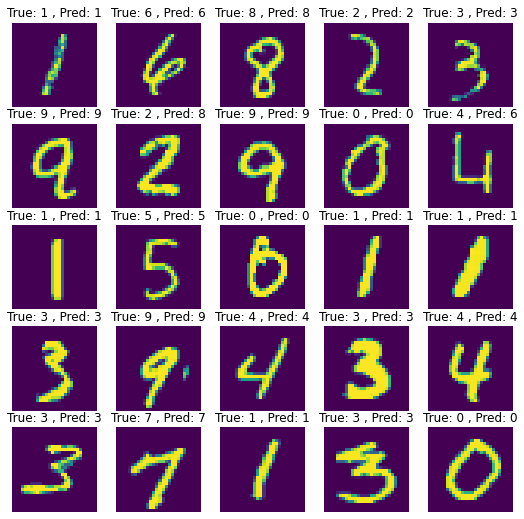

In [19]:
random = np.random.randint(xtest.shape[0], size=25)
fig, axs = plt.subplots(5,5,figsize=(9, 9))
r=0
for i in range(5):
    for j in range(5):
        axs[i,j].set_axis_off()
        axs[i,j].imshow(xtest[random[r]].reshape(28, 28))
        axs[i,j].set_title('True: %d , Pred: %d' % (ytest[random[r]], y_pred_final_test[random[r]]))
        r+=1
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain, ytrain)
er = 1-neigh.score(xtest, ytest)

In [23]:
print('3-NN Error:', er)

3-NN Error: 0.02949999999999997
